# Table of Content
- [Imports](#imports)
- [Resources](#resources)
- [Load Data Sets](#load-data-sets)
- [Finish Data Cleaning

as mentioned in task 4.8 there is something wrong with the prices column](#finish-data-cleaning

as-mentioned-in-task-4.8-there-is-something-wrong-with-the-prices-column)
- [Create Data Samples](#create-data-samples)
- [Basic Visualizations](#basic-visualizations)
	- [Bar Chart](#bar-chart)
	- [Histogram](#histogram)
	- [Scatterplot](#scatterplot)
	- [Linechart](#linechart)
- [Sales distributed throughout the day](#sales-distributed-throughout-the-day)
- [Number of orders by customers per loyalty group](#number-of-orders-by-customers-per-loyalty-group)
- [Prices distributed throughout the day](#prices-distributed-throughout-the-day)
- [Customer demographics](#customer-demographics)
	- [Age and number of dependants](#age-and-number-of-dependants)
	- [Age and income](#age-and-income)


## Imports [#](#table-of-content)

In [1]:
# standard library
import sys
import os
import time
from pathlib import Path

# 3rd party libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Resources [#](#table-of-content)

In [2]:
# project folder
project_folder = Path(r"C:\Users\vynde\Desktop\CareerFoundry Data Analytics\Data Immersion - 4 Python Fundamentals for Data Analysts\Instacart_Basket_Analysis")

# resource folders
original_data_folder = project_folder / "02_Data" / "Original_Data"
prepared_data_folder = project_folder / "02_Data" / "Prepared_Data"
plot_folder = project_folder / "04_Analysis" / "Visualizations"

# input files
orders_products_customers_merged_data_file = prepared_data_folder / "orders_products_customers_merged.pkl"

# output files
# None

## Load Data Sets [#](#table-of-content)

In [3]:
df = pd.read_pickle(orders_products_customers_merged_data_file)

## Finish Data Cleaning

as mentioned in task 4.8 there is something wrong with the prices column [#](#table-of-content)

In [4]:
# replace odd values with nan
#df.loc[df["prices"]>25, "prices"] = np.nan
df["prices"].value_counts().sort_index()

1.0     115143
1.1     242782
1.2     256258
1.3     425691
1.4     392209
         ...  
24.6      1962
24.7      7283
24.8       410
24.9      5781
25.0     13772
Name: prices, Length: 240, dtype: int64

In [22]:
# change date type
df["date_joined"] = pd.to_datetime(df["date_joined"])

## Create Data Samples [#](#table-of-content)

In [6]:
np.random.seed(4)
# pointer for sample creation
dev = np.random.rand(len(df)) <= 0.7
# 70% sample
df_big = df[dev]
# 30% sample
df_small = df[~dev]

## Basic Visualizations [#](#table-of-content)

In [7]:
df_small.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_days_since_prior_order,order_freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329.0,1.0,1.0,2.0,8.0,0.0,196.0,1.0,0.0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423.0
2,473747.0,1.0,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423.0
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423.0
6,550135.0,1.0,7.0,1.0,9.0,20.0,196.0,1.0,1.0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423.0
10,2539329.0,1.0,1.0,2.0,8.0,0.0,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,...,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423.0


##### Bar Chart [#](#table-of-content)

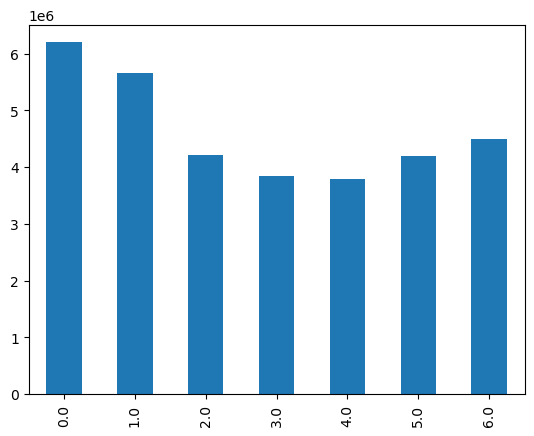

In [8]:
# create bar chart for value counts of orders_day_of_week and export to png
df["orders_day_of_week"].value_counts().sort_index().plot.bar().figure.savefig(plot_folder / "orders_dow_bar.png")

##### Histogram [#](#table-of-content)

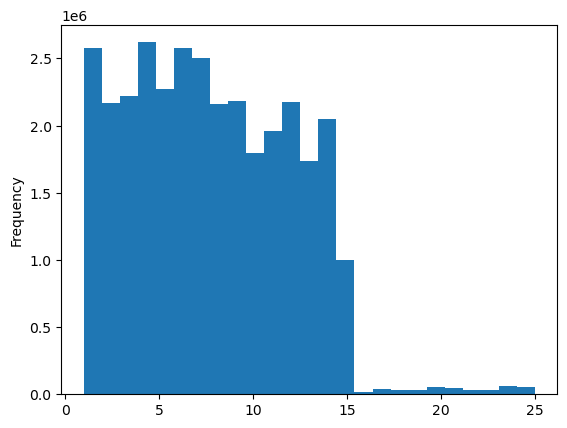

In [9]:
# create histogram for prices and export to png
df["prices"].plot.hist(bins = 25).figure.savefig(plot_folder / "prices_hist.png")

##### Scatterplot [#](#table-of-content)

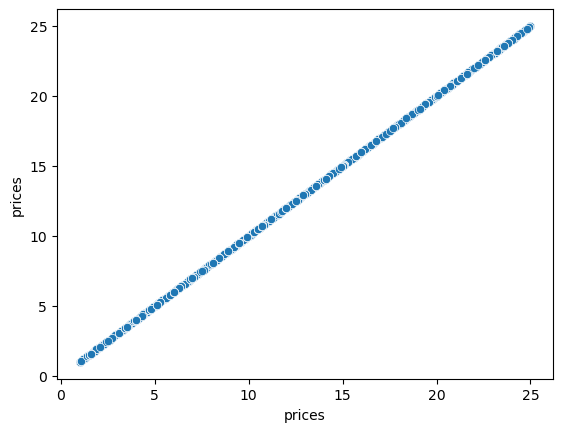

In [10]:
# create scatterplot of prices and export
sns.scatterplot(x="prices", y="prices", data=df).figure.savefig(plot_folder / "prices_prices_scatter.png")

#####  Linechart [#](#table-of-content)

111.28888726234436

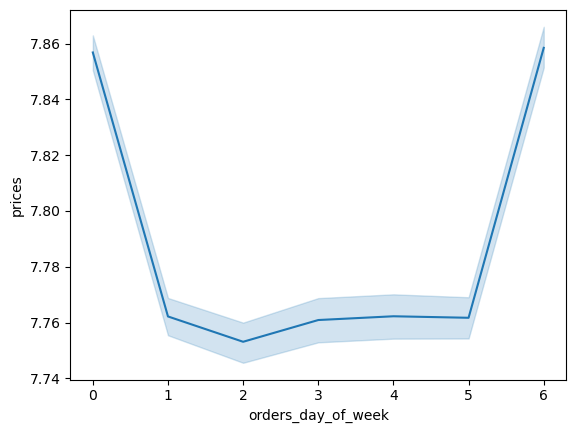

In [11]:
# create a seaborn lineplot of prices by weekday and export
tic = time.time()
line = sns.lineplot(data=df_small, x="orders_day_of_week", y="prices").figure.savefig(plot_folder / "day_prices_line.png")
time.time() - tic

## Sales distributed throughout the day  [#](#table-of-content)

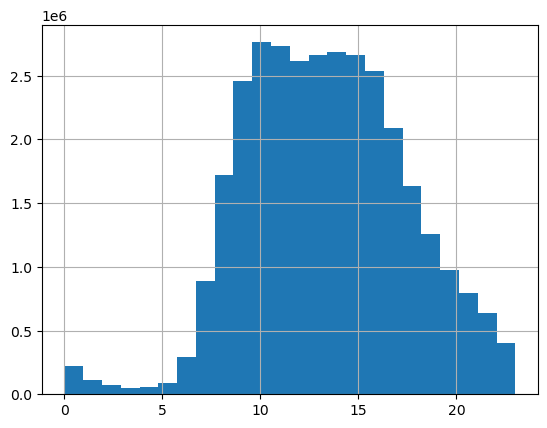

In [12]:
# create histogram of order counts per hour
df["order_hour_of_day"].hist(bins=24).figure.savefig(plot_folder / "orderhour_hist.png")

>- The most orders are made between 9 AM and 4 PM.
>- After 4 PM, the sales numbers sharply decline. 
>- The lowest point is between 0 and 5 AM.

## Number of orders by customers per loyalty group [#](#table-of-content)

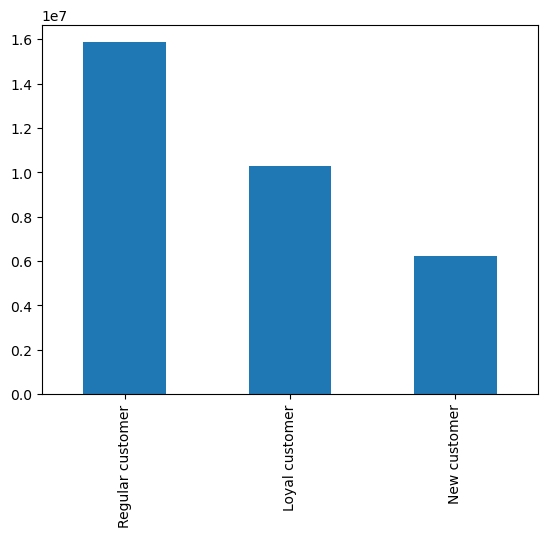

In [13]:
# create bar chart with user counts for different loyalty groups and export to png
df["loyalty_flag"].value_counts().plot.bar().figure.savefig(plot_folder / "loyaltyCount_bar.png")

## Prices distributed throughout the day [#](#table-of-content)

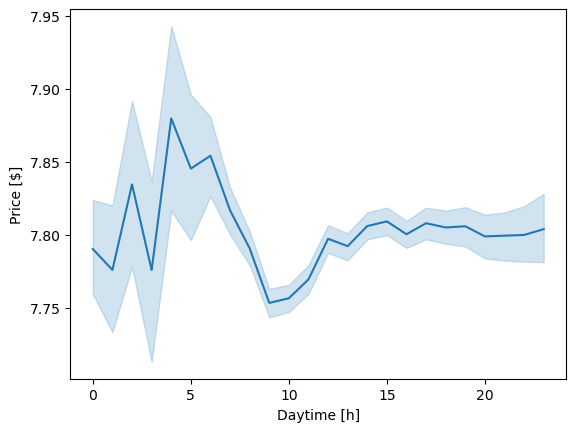

In [7]:
# create lineplot of prices by hour and export to png
ax = sns.lineplot(data=df_small, x="order_hour_of_day", y="prices")
plt.xlabel("Daytime in Hour")
plt.ylabel("Price in USD")
ax.figure.savefig(plot_folder / "hour_prices_line.png")

<AxesSubplot:xlabel='order_hour_of_day'>

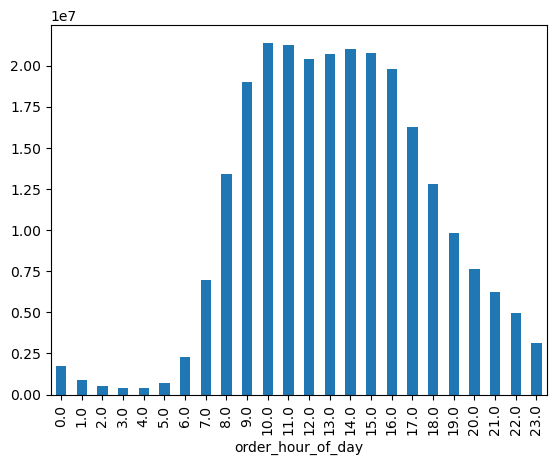

In [18]:
df.groupby("order_hour_of_day")["prices"].sum().plot.bar()

## Customer demographics [#](#table-of-content)

##### Age and number of dependants [#](#table-of-content)

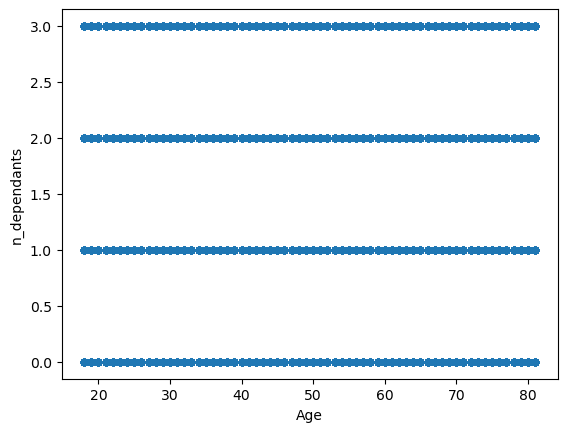

In [15]:
# create scatter plot for number of depentants over age, export to png
df.plot.scatter(x="Age", y="n_dependants").figure.savefig(plot_folder / "age_dependants_scatter.png")

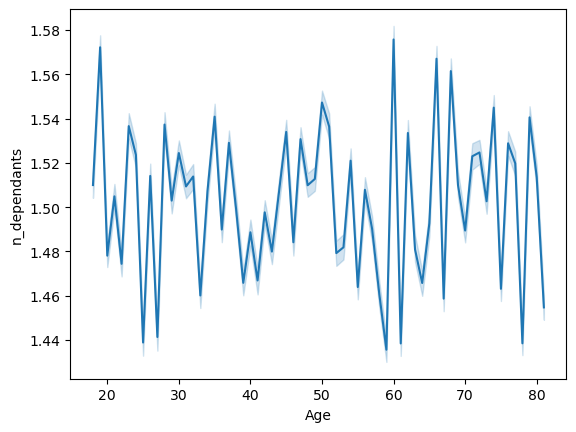

In [16]:
# plot same data as a lineplot, export to png
sns.lineplot(data=df_small, x="Age", y="n_dependants").figure.savefig(plot_folder / "age_dependants_line.png")

>- Across all ages the number of dependants fluctuates around 1.5 with a small confidence intervall
>- This plot doesn't tell us that 1.5 is the mean of the random distribution of 0, 1, 2 and 3
>- This can be seen in the scatterplot above.

##### Age and income [#](#table-of-content)

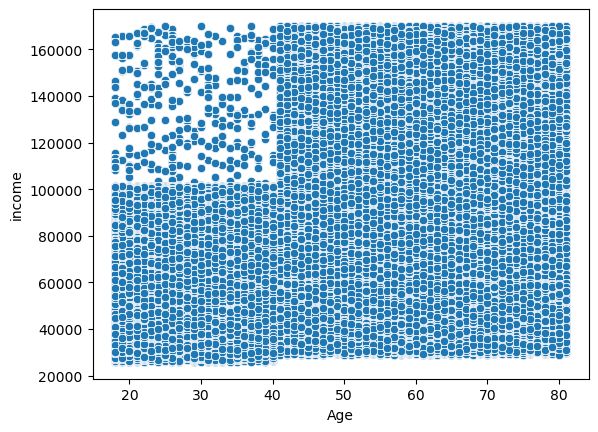

In [17]:
# create a scatterplot for income over age, export to png
sns.scatterplot(data=df, x="Age", y="income").figure.savefig(plot_folder / "age_income_scatter.png")

>- Note that incomes above 170k were neglected due to its strange distribution
>- There are fewer people under 40 years old with incomes over 100k
>- This seems a bit odd because of the sharp cut.
>- The rest seems randomly distributed without any correlation

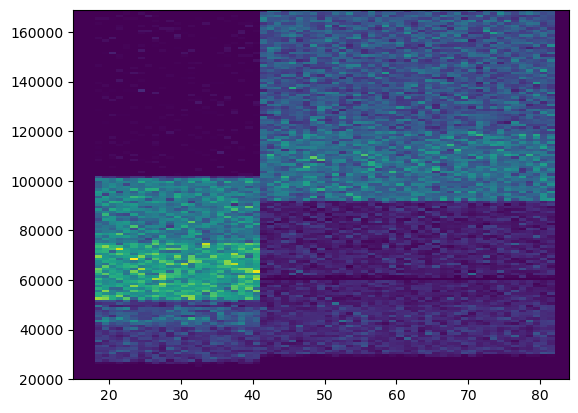

In [18]:
# create a 2d histogram for the same data, export to png
fig, ax = plt.subplots()
ax.hist2d(df["Age"], df["income"], bins=(np.arange(15, 85, 1), np.arange(20000,170000,1000)));
fig.savefig(plot_folder / "age_dependants_heatmap.png")

>- this kind of heatmap is a more suitable chart to see relationship
>- Below age 40, most people have incomes from 60-100k
>- Above age 40, most people tend to have incomes above 90k
>- Still, these sharp cuts in the distributions are weird